In [1]:
pwd

'/Users/kively/Desktop/DSML-UCL/COMP_SCI_Dept./TERM_1/Intro_to_Deep_Learning(COMP0090)/assignments /Rolling/Coursework 1/Task 3.2'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
from sklearn.metrics import accuracy_score

In [2]:
val_images = np.load('fashion-dev-imgs.npz')
val_labels=np.load('fashion-dev-labels.npz')
#train set
train_imgs=np.load('fashion-train-imgs.npz')
train_labels=np.load('fashion-train-labels.npz')
#test set
test_imgs=np.load('fashion-test-imgs.npz')
test_labels=np.load('fashion-test-labels.npz')


In [4]:
print(train_labels)
np.shape(train_labels)

[0 0 1 ... 1 1 1]


(12000,)

In [5]:
#train_imgs
train_imgs_t=train_imgs.T
np.shape(train_imgs_t)

(12000, 28, 28)

In [6]:
#validation set
val_imgs_t=val_images.T
np.shape(val_imgs_t)
print(np.shape(val_labels))

(1000,)


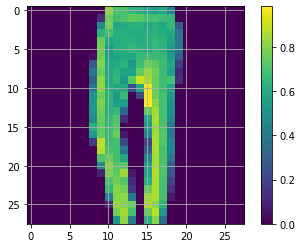

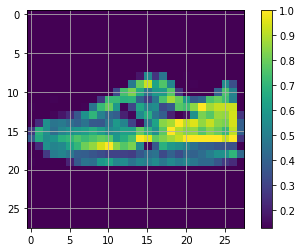

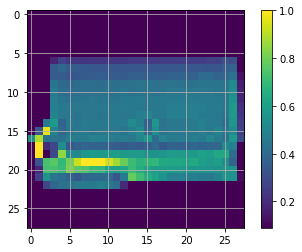

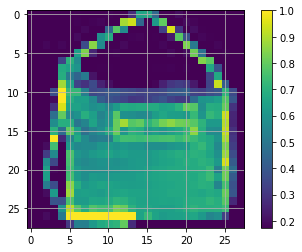

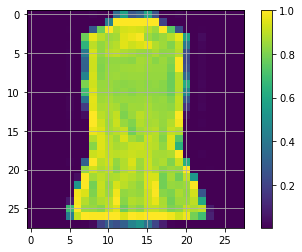

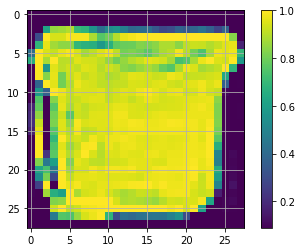

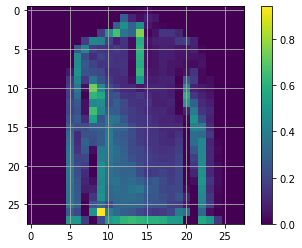

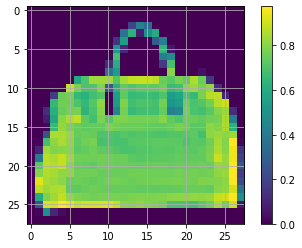

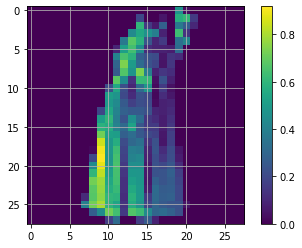

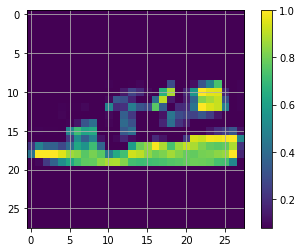

(12000, 784)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.1308131  0.1308131  0.1308131  ... 0.1308131  0.1308131  0.1308131 ]
 [0.08962205 0.08962205 0.08962205 ... 0.08962205 0.08962205 0.08962205]
 ...
 [0.04505032 0.04505032 0.04505032 ... 0.04505032 0.04505032 0.04505032]
 [0.         0.         0.         ... 0.09770436 0.         0.        ]
 [0.0014855  0.0014855  0.0014855  ... 0.0014855  0.0014855  0.0014855 ]]
min value 0.0


In [7]:
x_train=[]

for i in range(train_imgs_t.shape[0]):
    if (i<10):
        #visualise first 10 items of the train set
        plt.figure()
        plt.imshow(train_imgs_t[i])
        plt.colorbar()
        plt.grid(True)
        plt.show()
    x_train.append(train_imgs_t[i].flatten()) #collapse the array into one dimension in row-major order 
x_train=np.array(x_train)
print(x_train.shape)
print(x_train)
print("min value",x_train.min())
#np.equal(x_train[0],train_conc_t[0])

In [8]:
#the same for the validation set
x_val=[]

for i in range(len(val_imgs_t)):
    x_val.append(val_imgs_t[i].flatten())
x_val=np.array(x_val)
print(np.shape(x_val))  #each row corresponds to one instance(image/item) and each column corresponds to pixel values
print(np.shape(val_labels))


(1000, 784)
(1000,)


In [9]:
print(np.shape(val_images))
print(np.shape(val_labels))
print(np.shape(train_imgs))
print(np.shape(train_labels))
print(np.shape(test_imgs))
print(np.shape(test_labels))

(28, 28, 1000)
(1000,)
(28, 28, 12000)
(12000,)
(28, 28, 1000)
(1000,)


In [10]:
def sigmoid(x):
    g=1/(1+np.exp(-x))
    return g

In [11]:
#trial in sigmoid given an array
a=np.array([0.1,0.5,0.6])
print(sigmoid(a))

[0.52497919 0.62245933 0.64565631]


In [12]:
size_train=x_train.shape[1]
print(size_train)

784


In [13]:
initial_w_train=np.zeros((size_train+1)) #weight vector plus bias term(the last position refers to the bias)
#each pixel of the image has an associated weight and a bias term



print(np.shape(initial_w_train))  



(785,)


In [14]:
#same procedure applies to the validation set
size_val=x_val.shape[1]

initial_w_val=np.zeros((size_val+1))

print(np.shape(initial_w_val))

(785,)


In [15]:
#function that maps the sigmoid outputs to either 0 or 1
def prob_to_class(g):
    p=[]
    for i in range(g.shape[0]):
        if (g[i]-0.5>=0):
            p.append(1)
        else:
            p.append(0)
    
    return p

In [16]:
def loss_func(weights,x,y):
    sigma=sigmoid(np.dot(x,weights)) 
    
    y_pred=prob_to_class(sigma)
    
    loss=0
    n=len(y)
    for i in range(len(y)):
        #loss+=(y[i]-y_pred[i])**2
        loss+=(y[i]-sigma[i])**2
    loss=loss/(2*n)
    
    return(loss)

In [17]:
def gradient(weights,x,y):
    n=len(y)
    grad_vector=np.zeros(np.shape(weights)) #stores the changes
    
    
    for i in range(len(y)):
        sigmoid_term=sigmoid(np.dot(x[i],weights))  #for each image compute its sigmoid term
        
        
        
        grad=-(y[i]-sigmoid_term)*sigmoid_term*(1-sigmoid_term)*x[i] #compute gradient for each image and store it into a vector 
        grad_vector=np.add(grad,grad_vector)  #add the corresponding term of the grad vector to the grad_vector
        
    grad_vector/=n 
    print(np.shape(grad_vector))
    print(np.shape(weights))
    
    return(grad_vector)

In [18]:
def predict(weights,x):
    sigma=sigmoid(np.dot(x,weights))
    
    return(prob_to_class(sigma))

In [19]:
def plot_loss(epochs,loss_train,loss_val):
        
        print(epochs.shape)
        print(loss_train.shape)
        print(loss_val.shape)
        plt.plot(epochs, loss_val, color='green', label='Validation Loss')
        plt.plot(epochs, loss_train, color='red', label='Training Loss')
        plt.title('Training and Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.show()
        plt.savefig('loss_logistic_regression.png')
        plt.figure()

In [20]:
def plot_accuracy(epochs,acc_train,acc_val):
        
        print(epochs.shape)
        print(acc_train.shape)
        print(acc_val.shape)
        plt.plot(epochs, acc_val, color='green', label='Validation Accuracy')
        plt.plot(epochs, acc_train, color='red', label='Training Accuracy')
        plt.title('Training and Validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
        plt.show()
        plt.savefig('accuracy_logistic_regression.png')
        plt.figure()

In [21]:
def training(weights,x,x_unseen,y,y_unseen,learning_rate,epochs):
    loss_t=[]
    loss_val=[]
    acc_t=[]
    acc_v=[]
    epoch_list=[]
 
    
    x_train_aug=np.hstack((x_train,np.ones((x_train.shape[0],1),dtype=x_train.dtype)))
   
    
    print("training set with one column of ones at the end: ", x_train_aug)
    print("shape of the training set" , x_train_aug.shape)


    
    x_val_aug=np.hstack((x_val,np.ones((x_val.shape[0],1),dtype=x_val.dtype)))
    print("validation set with one column of ones at the end: ", x_val_aug)
    print("shape of the validation set", x_val_aug.shape)
   

    
    for iterations in range(epochs):
        epoch_list.append(iterations+1)  #epoch 1+
        h=gradient(weights,x_train_aug,y) #gradient vector for training set 
     
        
        print("1st element of gradient vector on training data", h[0])
        print("###")
        print("current weight on 1st position - training set", weights[0])
        print("---")
        weights=np.subtract(weights,learning_rate*h) #stochastic gradient descent to find the new weights 
        print("updated weight", weights[0])
        print("---")
        
        
        #for the training set(metrics)
        loss_of_epoch_train=loss_func(weights,x_train_aug,y)
        print("loss of training set for epoch "+str(iterations+1) +" "+str(loss_of_epoch_train))
        loss_t.append(loss_of_epoch_train)
        predictions_t=predict(weights,x_train_aug)
        accuracy_t=accuracy_score(y,predictions_t)
        acc_t.append(accuracy_t)
        
        print("accuracy of training set for epoch "+str(iterations+1) +" "+str(accuracy_t))
        
        
        #for the validation set(metrics)
        loss_of_epoch_val=loss_func(weights,x_val_aug,y_unseen)
        print("loss of validation set for epoch "+str(iterations+1) +" "+str(loss_of_epoch_val))
        loss_val.append(loss_of_epoch_val)
        predictions_val=predict(weights,x_val_aug)
        accuracy_val=accuracy_score(y_unseen,predictions_val)  #was labels before 
        acc_v.append(accuracy_val)
        
        print("accuracy of validation set for epoch "+str(iterations+1) +" "+str(accuracy_val))
    
    
    plot_accuracy(np.array(epoch_list),np.array(acc_t),np.array(acc_v))
    plot_loss(np.array(epoch_list),np.array(loss_t),np.array(loss_val))
    
    return weights

In [22]:
v1=np.array([4,5,6])
v2=np.array([1,2,3])
v1=np.subtract(v1,0.01*v2)
print(v1)

[3.99 4.98 5.97]


training set with one column of ones at the end:  [[0.         0.         0.         ... 0.         0.         1.        ]
 [0.1308131  0.1308131  0.1308131  ... 0.1308131  0.1308131  1.        ]
 [0.08962205 0.08962205 0.08962205 ... 0.08962205 0.08962205 1.        ]
 ...
 [0.04505032 0.04505032 0.04505032 ... 0.04505032 0.04505032 1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.0014855  0.0014855  0.0014855  ... 0.0014855  0.0014855  1.        ]]
shape of the training set (12000, 785)
validation set with one column of ones at the end:  [[0.         0.         0.         ... 0.         0.         1.        ]
 [0.1308131  0.1308131  0.1308131  ... 0.1308131  0.1308131  1.        ]
 [0.08962205 0.08962205 0.08962205 ... 0.08962205 0.08962205 1.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.    

loss of training set for epoch 18 0.07345587160436133
accuracy of training set for epoch 18 0.8221666666666667
loss of validation set for epoch 18 0.07240412439839536
accuracy of validation set for epoch 18 0.83
(785,)
(785,)
1st element of gradient vector on training data 0.00036871970718165383
###
current weight on 1st position - training set -0.0006754536831027563
---
updated weight -0.0007123256538209218
---
loss of training set for epoch 19 0.07234375973883161
accuracy of training set for epoch 19 0.82425
loss of validation set for epoch 19 0.07125427646638345
accuracy of validation set for epoch 19 0.833
(785,)
(785,)
1st element of gradient vector on training data 0.0003666370298737778
###
current weight on 1st position - training set -0.0007123256538209218
---
updated weight -0.0007489893568082995
---
loss of training set for epoch 20 0.07129142762588972
accuracy of training set for epoch 20 0.8253333333333334
loss of validation set for epoch 20 0.07016548312837216
accuracy of 

loss of training set for epoch 39 0.057805101715578636
accuracy of training set for epoch 39 0.8763333333333333
loss of validation set for epoch 39 0.056195110475407276
accuracy of validation set for epoch 39 0.894
(785,)
(785,)
1st element of gradient vector on training data 0.0003407745484907775
###
current weight on 1st position - training set -0.001417936216883329
---
updated weight -0.0014520136717324067
---
loss of training set for epoch 40 0.05730271205090915
accuracy of training set for epoch 40 0.8793333333333333
loss of validation set for epoch 40 0.055675971239176086
accuracy of validation set for epoch 40 0.897
(785,)
(785,)
1st element of gradient vector on training data 0.0003398074252474769
###
current weight on 1st position - training set -0.0014520136717324067
---
updated weight -0.0014859944142571544
---
loss of training set for epoch 41 0.05681369714433772
accuracy of training set for epoch 41 0.8815
loss of validation set for epoch 41 0.05517086511424367
accuracy of

(785,)
(785,)
1st element of gradient vector on training data 0.00032278599705352044
###
current weight on 1st position - training set -0.0020820200800927675
---
updated weight -0.0021142986797981194
---
loss of training set for epoch 60 0.04945573421340538
accuracy of training set for epoch 60 0.9155833333333333
loss of validation set for epoch 60 0.0476027185256939
accuracy of validation set for epoch 60 0.928
(785,)
(785,)
1st element of gradient vector on training data 0.0003219349989910623
###
current weight on 1st position - training set -0.0021142986797981194
---
updated weight -0.0021464921796972257
---
loss of training set for epoch 61 0.04914709740480934
accuracy of training set for epoch 61 0.91675
loss of validation set for epoch 61 0.04728679698220234
accuracy of validation set for epoch 61 0.929
(785,)
(785,)
1st element of gradient vector on training data 0.00032108737585605663
###
current weight on 1st position - training set -0.0021464921796972257
---
updated weight -0

accuracy of validation set for epoch 80 0.944
(785,)
(785,)
1st element of gradient vector on training data 0.00030561422321906243
###
current weight on 1st position - training set -0.0027424408644624895
---
updated weight -0.002773002286784396
---
loss of training set for epoch 81 0.04405807619321815
accuracy of training set for epoch 81 0.932
loss of validation set for epoch 81 0.04209848909768437
accuracy of validation set for epoch 81 0.944
(785,)
(785,)
1st element of gradient vector on training data 0.00030483420015257954
###
current weight on 1st position - training set -0.002773002286784396
---
updated weight -0.0028034857067996536
---
loss of training set for epoch 82 0.04384783956971912
accuracy of training set for epoch 82 0.9325833333333333
loss of validation set for epoch 82 0.041885038734780715
accuracy of validation set for epoch 82 0.945
(785,)
(785,)
1st element of gradient vector on training data 0.00030405778623981793
###
current weight on 1st position - training set

loss of training set for epoch 101 0.0404226528883083
accuracy of training set for epoch 101 0.9395833333333333
loss of validation set for epoch 101 0.038418165069203786
accuracy of validation set for epoch 101 0.948
(785,)
(785,)
1st element of gradient vector on training data 0.0002900188797489887
###
current weight on 1st position - training set -0.0033683432787409693
---
updated weight -0.003397345166715868
---
loss of training set for epoch 102 0.040267828301421976
accuracy of training set for epoch 102 0.9399166666666666
loss of validation set for epoch 102 0.03826194709937816
accuracy of validation set for epoch 102 0.948
(785,)
(785,)
1st element of gradient vector on training data 0.0002893184869380949
###
current weight on 1st position - training set -0.003397345166715868
---
updated weight -0.0034262770154096776
---
loss of training set for epoch 103 0.040115167106066815
accuracy of training set for epoch 103 0.9404166666666667
loss of validation set for epoch 103 0.03810795

loss of validation set for epoch 121 0.035667820420144145
accuracy of validation set for epoch 121 0.953
(785,)
(785,)
1st element of gradient vector on training data 0.00027674765237897705
###
current weight on 1st position - training set -0.003935516755487586
---
updated weight -0.003963191520725483
---
loss of training set for epoch 122 0.03757125191917981
accuracy of training set for epoch 122 0.9435
loss of validation set for epoch 122 0.03554833078871027
accuracy of validation set for epoch 122 0.953
(785,)
(785,)
1st element of gradient vector on training data 0.0002761242514666478
###
current weight on 1st position - training set -0.003963191520725483
---
updated weight -0.003990803945872148
---
loss of training set for epoch 123 0.03745366133581201
accuracy of training set for epoch 123 0.9434166666666667
loss of validation set for epoch 123 0.03543031794376265
accuracy of validation set for epoch 123 0.953
(785,)
(785,)
1st element of gradient vector on training data 0.000275

loss of training set for epoch 141 0.035556020034191595
accuracy of training set for epoch 141 0.946
loss of validation set for epoch 141 0.0335297618527784
accuracy of validation set for epoch 141 0.955
(785,)
(785,)
1st element of gradient vector on training data 0.00026497063329092237
###
current weight on 1st position - training set -0.00447758561090754
---
updated weight -0.004504082674236632
---
loss of training set for epoch 142 0.03546139612930747
accuracy of training set for epoch 142 0.9459166666666666
loss of validation set for epoch 142 0.033435189264971264
accuracy of validation set for epoch 142 0.955
(785,)
(785,)
1st element of gradient vector on training data 0.0002644186721191711
###
current weight on 1st position - training set -0.004504082674236632
---
updated weight -0.004530524541448549
---
loss of training set for epoch 143 0.0353677822445523
accuracy of training set for epoch 143 0.9461666666666667
loss of validation set for epoch 143 0.03334164494074638
accurac

loss of training set for epoch 162 0.03376069944139343
accuracy of training set for epoch 162 0.948
loss of validation set for epoch 162 0.03173872240282058
accuracy of validation set for epoch 162 0.955
(785,)
(785,)
1st element of gradient vector on training data 0.0002540585850135343
###
current weight on 1st position - training set -0.005022868057953274
---
updated weight -0.005048273916454627
---
loss of training set for epoch 163 0.0336841956569891
accuracy of training set for epoch 163 0.948
loss of validation set for epoch 163 0.031662558692322616
accuracy of validation set for epoch 163 0.955
(785,)
(785,)
1st element of gradient vector on training data 0.0002535728987464199
###
current weight on 1st position - training set -0.005048273916454627
---
updated weight -0.005073631206329269
---
loss of training set for epoch 164 0.03360841521577679
accuracy of training set for epoch 164 0.948
loss of validation set for epoch 164 0.03158712801573464
accuracy of validation set for ep

(785,)
(785,)
1st element of gradient vector on training data 0.0002448764851030182
###
current weight on 1st position - training set -0.005522080244884501
---
updated weight -0.005546567893394803
---
loss of training set for epoch 183 0.03229289419793742
accuracy of training set for epoch 183 0.9491666666666667
loss of validation set for epoch 183 0.030279743249130305
accuracy of validation set for epoch 183 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.00024444534258161475
###
current weight on 1st position - training set -0.005546567893394803
---
updated weight -0.0055710124276529644
---
loss of training set for epoch 184 0.032229577216575676
accuracy of training set for epoch 184 0.9491666666666667
loss of validation set for epoch 184 0.030216916958161418
accuracy of validation set for epoch 184 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.00024401671870398202
###
current weight on 1st position - training set -0.0055710124276529644
-

loss of training set for epoch 203 0.031120809010411865
accuracy of training set for epoch 203 0.9500833333333333
loss of validation set for epoch 203 0.02911821967044065
accuracy of validation set for epoch 203 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.00023632681849213152
###
current weight on 1st position - training set -0.006027590702421581
---
updated weight -0.0060512233842707945
---
loss of training set for epoch 204 0.031066983083327372
accuracy of training set for epoch 204 0.9500833333333333
loss of validation set for epoch 204 0.029064953527359244
accuracy of validation set for epoch 204 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.00023594473379963816
###
current weight on 1st position - training set -0.0060512233842707945
---
updated weight -0.006074817857650758
---
loss of training set for epoch 205 0.031013571086332178
accuracy of training set for epoch 205 0.9501666666666667
loss of validation set for epoch 205 0.0290

(785,)
(785,)
1st element of gradient vector on training data 0.0002290746414438811
###
current weight on 1st position - training set -0.0064932215349807025
---
updated weight -0.00651612899912509
---
loss of training set for epoch 224 0.03007110833652057
accuracy of training set for epoch 224 0.9513333333333334
loss of validation set for epoch 224 0.02808059781135713
accuracy of validation set for epoch 224 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.0002287324919043762
###
current weight on 1st position - training set -0.00651612899912509
---
updated weight -0.006539002248315528
---
loss of training set for epoch 225 0.030025011085342095
accuracy of training set for epoch 225 0.9513333333333334
loss of validation set for epoch 225 0.02803508625602233
accuracy of validation set for epoch 225 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.0002283921838866777
###
current weight on 1st position - training set -0.006539002248315528
---
upda

(785,)
(785,)
1st element of gradient vector on training data 0.0002222584297551769
###
current weight on 1st position - training set -0.006967329983649421
---
updated weight -0.006989555826624938
---
loss of training set for epoch 245 0.02916635850129609
accuracy of training set for epoch 245 0.95225
loss of validation set for epoch 245 0.027188155450928668
accuracy of validation set for epoch 245 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00022195218618108181
###
current weight on 1st position - training set -0.006989555826624938
---
updated weight -0.007011751045243046
---
loss of training set for epoch 246 0.029126347696481533
accuracy of training set for epoch 246 0.9523333333333334
loss of validation set for epoch 246 0.02714872725455619
accuracy of validation set for epoch 246 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.0002216475160073967
###
current weight on 1st position - training set -0.007011751045243046
---
updated weig

(785,)
(785,)
1st element of gradient vector on training data 0.00021614289852260179
###
current weight on 1st position - training set -0.00742784409651876
---
updated weight -0.00744945838637102
---
loss of training set for epoch 266 0.028376778044415674
accuracy of training set for epoch 266 0.9525
loss of validation set for epoch 266 0.026410627737316655
accuracy of validation set for epoch 266 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00021586739121274578
###
current weight on 1st position - training set -0.00744945838637102
---
updated weight -0.0074710451254922945
---
loss of training set for epoch 267 0.028341651854681148
accuracy of training set for epoch 267 0.9525
loss of validation set for epoch 267 0.026376063642461606
accuracy of validation set for epoch 267 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00021559323394063797
###
current weight on 1st position - training set -0.0074710451254922945
---
updated weight -0.0074

loss of training set for epoch 286 0.027711649773681415
accuracy of training set for epoch 286 0.953
loss of validation set for epoch 286 0.025756476168151566
accuracy of validation set for epoch 286 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00021062840656180137
###
current weight on 1st position - training set -0.007876132476696877
---
updated weight -0.007897195317353058
---
loss of training set for epoch 287 0.027680335199607265
accuracy of training set for epoch 287 0.953
loss of validation set for epoch 287 0.025725694550535763
accuracy of validation set for epoch 287 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00021037933080815893
###
current weight on 1st position - training set -0.007897195317353058
---
updated weight -0.007918233250433874
---
loss of training set for epoch 288 0.027649193337451108
accuracy of training set for epoch 288 0.9530833333333333
loss of validation set for epoch 288 0.02569508402225111
accuracy of v

loss of training set for epoch 307 0.027088360011045864
accuracy of training set for epoch 307 0.9536666666666667
loss of validation set for epoch 307 0.025144023071235994
accuracy of validation set for epoch 307 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00020563196296623028
###
current weight on 1st position - training set -0.008313371677935569
---
updated weight -0.008333934874232191
---
loss of training set for epoch 308 0.027060370527509543
accuracy of training set for epoch 308 0.9536666666666667
loss of validation set for epoch 308 0.02511653027847854
accuracy of validation set for epoch 308 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.0002054057304851129
###
current weight on 1st position - training set -0.008333934874232191
---
updated weight -0.008354475447280702
---
loss of training set for epoch 309 0.02703252483452244
accuracy of training set for epoch 309 0.95375
loss of validation set for epoch 309 0.025089179458599013


loss of training set for epoch 328 0.026529250992233775
accuracy of training set for epoch 328 0.9543333333333334
loss of validation set for epoch 328 0.02459495608350303
accuracy of validation set for epoch 328 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00020108429637508517
###
current weight on 1st position - training set -0.008740578166562485
---
updated weight -0.008760686596199994
---
loss of training set for epoch 329 0.026504044986898876
accuracy of training set for epoch 329 0.9543333333333334
loss of validation set for epoch 329 0.024570207611240506
accuracy of validation set for epoch 329 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00020087790659443418
###
current weight on 1st position - training set -0.008760686596199994
---
updated weight -0.008780774386859437
---
loss of training set for epoch 330 0.026478960090540356
accuracy of training set for epoch 330 0.9543333333333334
loss of validation set for epoch 330 0.02454557

loss of training set for epoch 349 0.026024147684314006
accuracy of training set for epoch 349 0.9543333333333334
loss of validation set for epoch 349 0.024099060154356068
accuracy of validation set for epoch 349 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.000196927370757676
###
current weight on 1st position - training set -0.009158634568323535
---
updated weight -0.009178327305399303
---
loss of training set for epoch 350 0.02600129749679364
accuracy of training set for epoch 350 0.9543333333333334
loss of validation set for epoch 350 0.024076627375304062
accuracy of validation set for epoch 350 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.0001967383038434174
###
current weight on 1st position - training set -0.009178327305399303
---
updated weight -0.009198001135783646
---
loss of training set for epoch 351 0.025978550368750856
accuracy of training set for epoch 351 0.9543333333333334
loss of validation set for epoch 351 0.02405429574

(785,)
(785,)
1st element of gradient vector on training data 0.00019328689242631425
###
current weight on 1st position - training set -0.009548982456748076
---
updated weight -0.009568311145990707
---
loss of training set for epoch 370 0.025564963697257505
accuracy of training set for epoch 370 0.9546666666666667
loss of validation set for epoch 370 0.023648241952743503
accuracy of validation set for epoch 370 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00019311234164902022
###
current weight on 1st position - training set -0.009568311145990707
---
updated weight -0.009587622380155609
---
loss of training set for epoch 371 0.025544126933437668
accuracy of training set for epoch 371 0.9546666666666667
loss of validation set for epoch 371 0.02362778274649064
accuracy of validation set for epoch 371 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00019293847130949268
###
current weight on 1st position - training set -0.009587622380155609
---


(785,)
(785,)
1st element of gradient vector on training data 0.00018975897582533928
###
current weight on 1st position - training set -0.009951307484146786
---
updated weight -0.00997028338172932
---
loss of training set for epoch 391 0.025145187370219303
accuracy of training set for epoch 391 0.9553333333333334
loss of validation set for epoch 391 0.02323600409797472
accuracy of validation set for epoch 391 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.000189597897830153
###
current weight on 1st position - training set -0.00997028338172932
---
updated weight -0.009989243171512336
---
loss of training set for epoch 392 0.025126086491080692
accuracy of training set for epoch 392 0.9553333333333334
loss of validation set for epoch 392 0.023217241988885102
accuracy of validation set for epoch 392 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018943742084652712
###
current weight on 1st position - training set -0.009989243171512336
---
up

(785,)
(785,)
1st element of gradient vector on training data 0.00018649807695903542
###
current weight on 1st position - training set -0.01034649660077394
---
updated weight -0.010365146408469843
---
loss of training set for epoch 412 0.024759512967317345
accuracy of training set for epoch 412 0.9555833333333333
loss of validation set for epoch 412 0.022857068501673388
accuracy of validation set for epoch 412 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018634892323776838
###
current weight on 1st position - training set -0.010365146408469843
---
updated weight -0.01038378130079362
---
loss of training set for epoch 413 0.024741920492399604
accuracy of training set for epoch 413 0.9556666666666667
loss of validation set for epoch 413 0.02283977756172446
accuracy of validation set for epoch 413 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018620030266510045
###
current weight on 1st position - training set -0.01038378130079362
---
u

(785,)
(785,)
1st element of gradient vector on training data 0.00018347397389273143
###
current weight on 1st position - training set -0.010735079503267273
---
updated weight -0.010753426900656546
---
loss of training set for epoch 433 0.024403571263393285
accuracy of training set for epoch 433 0.9563333333333334
loss of validation set for epoch 433 0.02250710169715614
accuracy of validation set for epoch 433 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.000183335418369046
###
current weight on 1st position - training set -0.010753426900656546
---
updated weight -0.01077176044249345
---
loss of training set for epoch 434 0.024387298863518283
accuracy of training set for epoch 434 0.9563333333333334
loss of validation set for epoch 434 0.02249109543663182
accuracy of validation set for epoch 434 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018319733772756116
###
current weight on 1st position - training set -0.01077176044249345
---
upd

(785,)
(785,)
1st element of gradient vector on training data 0.00018066072786082803
###
current weight on 1st position - training set -0.011117526843131033
---
updated weight -0.011135592915917116
---
loss of training set for epoch 454 0.02407372956174397
accuracy of training set for epoch 454 0.9565
loss of validation set for epoch 454 0.022182511317558485
accuracy of validation set for epoch 454 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018053162947729957
###
current weight on 1st position - training set -0.011135592915917116
---
updated weight -0.011153646078864847
---
loss of training set for epoch 455 0.02405861989637582
accuracy of training set for epoch 455 0.9565
loss of validation set for epoch 455 0.02216763438612668
accuracy of validation set for epoch 455 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.0001804029557132953
###
current weight on 1st position - training set -0.011153646078864847
---
updated weight -0.0111716

(785,)
(785,)
1st element of gradient vector on training data 0.0001780359709768589
###
current weight on 1st position - training set -0.01149425848310692
---
updated weight -0.011512062080204605
---
loss of training set for epoch 475 0.02376694108714908
accuracy of training set for epoch 475 0.9569166666666666
loss of validation set for epoch 475 0.02188029310106478
accuracy of validation set for epoch 475 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017791534333916592
###
current weight on 1st position - training set -0.011512062080204605
---
updated weight -0.011529853614538522
---
loss of training set for epoch 476 0.023752861611504777
accuracy of training set for epoch 476 0.9569166666666666
loss of validation set for epoch 476 0.021866415003033452
accuracy of validation set for epoch 476 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017779509676676484
###
current weight on 1st position - training set -0.011529853614538522
---
u

loss of training set for epoch 495 0.023493833256600014
accuracy of training set for epoch 495 0.95725
loss of validation set for epoch 495 0.021610944138477636
accuracy of validation set for epoch 495 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017558032718765937
###
current weight on 1st position - training set -0.011865650396273809
---
updated weight -0.011883208428992575
---
loss of training set for epoch 496 0.023480630062688017
accuracy of training set for epoch 496 0.9573333333333334
loss of validation set for epoch 496 0.021597914362145195
accuracy of validation set for epoch 496 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017546731382906243
###
current weight on 1st position - training set -0.011883208428992575
---
updated weight -0.011900755160375481
---
loss of training set for epoch 497 0.02346746827027083
accuracy of training set for epoch 497 0.9573333333333334
loss of validation set for epoch 497 0.02158492463748744

loss of training set for epoch 516 0.02322498037876889
accuracy of training set for epoch 516 0.9575833333333333
loss of validation set for epoch 516 0.021345455574363275
accuracy of validation set for epoch 516 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017327693944026764
###
current weight on 1st position - training set -0.0122320404595425
---
updated weight -0.012249368153486527
---
loss of training set for epoch 517 0.023212602957301206
accuracy of training set for epoch 517 0.9575833333333333
loss of validation set for epoch 517 0.021333224169878044
accuracy of validation set for epoch 517 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.000173170793572191
###
current weight on 1st position - training set -0.012249368153486527
---
updated weight -0.012266685232843747
---
loss of training set for epoch 518 0.02320026268318397
accuracy of training set for epoch 518 0.9576666666666667
loss of validation set for epoch 518 0.02132102865

loss of training set for epoch 537 0.02297261414559293
accuracy of training set for epoch 537 0.9579166666666666
loss of validation set for epoch 537 0.021095897754891138
accuracy of validation set for epoch 537 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017111108175177733
###
current weight on 1st position - training set -0.01259373334239475
---
updated weight -0.012610844450569928
---
loss of training set for epoch 538 0.022960979186854767
accuracy of training set for epoch 538 0.9579166666666666
loss of validation set for epoch 538 0.0210843833501425
accuracy of validation set for epoch 538 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017101114960720298
###
current weight on 1st position - training set -0.012610844450569928
---
updated weight -0.012627945565530648
---
loss of training set for epoch 539 0.022949377704931297
accuracy of training set for epoch 539 0.9579166666666666
loss of validation set for epoch 539 0.021072901

(785,)
(785,)
1st element of gradient vector on training data 0.00016916438887926396
###
current weight on 1st position - training set -0.012934088212793095
---
updated weight -0.012951004651681022
---
loss of training set for epoch 558 0.022735101025163313
accuracy of training set for epoch 558 0.9581666666666667
loss of validation set for epoch 558 0.020860677010963745
accuracy of validation set for epoch 558 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.0001690698393983878
###
current weight on 1st position - training set -0.012951004651681022
---
updated weight -0.01296791163562086
---
loss of training set for epoch 559 0.022724136455028642
accuracy of training set for epoch 559 0.9581666666666667
loss of validation set for epoch 559 0.020849809384568055
accuracy of validation set for epoch 559 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.000168975546464235
###
current weight on 1st position - training set -0.01296791163562086
---
up

(785,)
(785,)
1st element of gradient vector on training data 0.00016723123821441296
###
current weight on 1st position - training set -0.01328738133792456
---
updated weight -0.013304104461746001
---
loss of training set for epoch 579 0.022511024117747747
accuracy of training set for epoch 579 0.9584166666666667
loss of validation set for epoch 579 0.020638414419607325
accuracy of validation set for epoch 579 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.000167141843988105
###
current weight on 1st position - training set -0.013304104461746001
---
updated weight -0.013320818646144811
---
loss of training set for epoch 580 0.02250066723732111
accuracy of training set for epoch 580 0.9584166666666667
loss of validation set for epoch 580 0.020628132631180546
accuracy of validation set for epoch 580 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00016705268357085682
###
current weight on 1st position - training set -0.013320818646144811
---
u

(785,)
(785,)
1st element of gradient vector on training data 0.00016540174292215055
###
current weight on 1st position - training set -0.013636720159954843
---
updated weight -0.013653260334247058
---
loss of training set for epoch 600 0.022299147850509755
accuracy of training set for epoch 600 0.9583333333333334
loss of validation set for epoch 600 0.020427910354386302
accuracy of validation set for epoch 600 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00016531705295241874
###
current weight on 1st position - training set -0.013653260334247058
---
updated weight -0.0136697920395423
---
loss of training set for epoch 601 0.02228934383611899
accuracy of training set for epoch 601 0.9583333333333334
loss of validation set for epoch 601 0.02041816124009546
accuracy of validation set for epoch 601 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00016523257663683338
###
current weight on 1st position - training set -0.0136697920395423
---
upd

(785,)
(785,)
1st element of gradient vector on training data 0.00016366695123537248
###
current weight on 1st position - training set -0.013982313217187162
---
updated weight -0.0139986799123107
---
loss of training set for epoch 621 0.022098389408531233
accuracy of training set for epoch 621 0.9585833333333333
loss of validation set for epoch 621 0.020228115859312397
accuracy of validation set for epoch 621 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00016358656515458374
###
current weight on 1st position - training set -0.0139986799123107
---
updated weight -0.014015038568826157
---
loss of training set for epoch 622 0.022089090092893896
accuracy of training set for epoch 622 0.9586666666666667
loss of validation set for epoch 622 0.020218852811991858
accuracy of validation set for epoch 622 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00016350637480555018
###
current weight on 1st position - training set -0.014015038568826157
---
upd

(785,)
(785,)
1st element of gradient vector on training data 0.00016201890471965961
###
current weight on 1st position - training set -0.01432435126752688
---
updated weight -0.014340553157998846
---
loss of training set for epoch 642 0.021907795443202205
accuracy of training set for epoch 642 0.9589166666666666
loss of validation set for epoch 642 0.02003810935981826
accuracy of validation set for epoch 642 0.961
(785,)
(785,)
1st element of gradient vector on training data 0.00016194246600145597
###
current weight on 1st position - training set -0.014340553157998846
---
updated weight -0.014356747404598991
---
loss of training set for epoch 643 0.021898958317904216
accuracy of training set for epoch 643 0.9589166666666666
loss of validation set for epoch 643 0.020029291332702977
accuracy of validation set for epoch 643 0.961
(785,)
(785,)
1st element of gradient vector on training data 0.000161866207029618
###
current weight on 1st position - training set -0.014356747404598991
---
u

accuracy of training set for epoch 662 0.9589166666666666
loss of validation set for epoch 662 0.019865505597479367
accuracy of validation set for epoch 662 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00016045050654942545
###
current weight on 1st position - training set -0.01466300923889365
---
updated weight -0.014679054289548594
---
loss of training set for epoch 663 0.02172652295009678
accuracy of training set for epoch 663 0.9589166666666666
loss of validation set for epoch 663 0.01985707758342839
accuracy of validation set for epoch 663 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00016037769676899053
###
current weight on 1st position - training set -0.014679054289548594
---
updated weight -0.014695092059225492
---
loss of training set for epoch 664 0.021718110343689853
accuracy of training set for epoch 664 0.9589166666666666
loss of validation set for epoch 664 0.019848668271038216
accuracy of validation set for epoch 664 0.96

loss of training set for epoch 683 0.021561862984695368
accuracy of training set for epoch 683 0.9590833333333333
loss of validation set for epoch 683 0.019692349916419313
accuracy of validation set for epoch 683 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015895540992968385
###
current weight on 1st position - training set -0.01499844792383024
---
updated weight -0.015014343464823207
---
loss of training set for epoch 684 0.02155382346711955
accuracy of training set for epoch 684 0.9590833333333333
loss of validation set for epoch 684 0.019684299827083335
accuracy of validation set for epoch 684 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015888594389109966
###
current weight on 1st position - training set -0.015014343464823207
---
updated weight -0.015030232059212317
---
loss of training set for epoch 685 0.021545801863640343
accuracy of training set for epoch 685 0.9590833333333333
loss of validation set for epoch 685 0.0196762

(785,)
(785,)
1st element of gradient vector on training data 0.00015759444322607682
###
current weight on 1st position - training set -0.015315056012697791
---
updated weight -0.015330815457020398
---
loss of training set for epoch 704 0.021396707028603645
accuracy of training set for epoch 704 0.9590833333333333
loss of validation set for epoch 704 0.01952683596690293
accuracy of validation set for epoch 704 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015752792319826127
###
current weight on 1st position - training set -0.015330815457020398
---
updated weight -0.015346568249340225
---
loss of training set for epoch 705 0.021389029936272223
accuracy of training set for epoch 705 0.9590833333333333
loss of validation set for epoch 705 0.01951913490463876
accuracy of validation set for epoch 705 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015746154478151226
###
current weight on 1st position - training set -0.015346568249340225
---

accuracy of training set for epoch 724 0.95925
loss of validation set for epoch 724 0.019375780868695406
accuracy of validation set for epoch 724 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.0001562265813541251
###
current weight on 1st position - training set -0.015644625949698746
---
updated weight -0.01566024860783416
---
loss of training set for epoch 725 0.021238887341165337
accuracy of training set for epoch 725 0.95925
loss of validation set for epoch 725 0.01936838814030666
accuracy of validation set for epoch 725 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015616292879972997
###
current weight on 1st position - training set -0.01566024860783416
---
updated weight -0.015675864900714133
---
loss of training set for epoch 726 0.021231545717105605
accuracy of training set for epoch 726 0.95925
loss of validation set for epoch 726 0.01936101025564278
accuracy of validation set for epoch 726 0.962
(785,)
(785,)
1st element of grad

loss of training set for epoch 745 0.02109491043074948
accuracy of training set for epoch 745 0.95925
loss of validation set for epoch 745 0.01922358241943253
accuracy of validation set for epoch 745 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.000154916808058189
###
current weight on 1st position - training set -0.01597138223385739
---
updated weight -0.01598687391466321
---
loss of training set for epoch 746 0.021087865736337055
accuracy of training set for epoch 746 0.95925
loss of validation set for epoch 746 0.019216490717001242
accuracy of validation set for epoch 746 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015485581384424893
###
current weight on 1st position - training set -0.01598687391466321
---
updated weight -0.016002359496047634
---
loss of training set for epoch 747 0.021080835349666708
accuracy of training set for epoch 747 0.95925
loss of validation set for epoch 747 0.019209412808289427
accuracy of validation set

loss of training set for epoch 766 0.02094991206014255
accuracy of training set for epoch 766 0.9595
loss of validation set for epoch 766 0.019077491771612998
accuracy of validation set for epoch 766 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.0001536609354285348
###
current weight on 1st position - training set -0.01629544258989694
---
updated weight -0.016310808683439794
---
loss of training set for epoch 767 0.020943157745954614
accuracy of training set for epoch 767 0.9595
loss of validation set for epoch 767 0.019070680099828596
accuracy of validation set for epoch 767 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015360241038131438
###
current weight on 1st position - training set -0.016310808683439794
---
updated weight -0.016326168924477927
---
loss of training set for epoch 768 0.02093641674867471
accuracy of training set for epoch 768 0.9595
loss of validation set for epoch 768 0.01906388127484737
accuracy of validation set 

loss of training set for epoch 786 0.020817305970413227
accuracy of training set for epoch 786 0.9595833333333333
loss of validation set for epoch 786 0.018943651467711514
accuracy of validation set for epoch 786 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015251150438223666
###
current weight on 1st position - training set -0.016601665201590433
---
updated weight -0.01661691635202866
---
loss of training set for epoch 787 0.020810809725208854
accuracy of training set for epoch 787 0.9595833333333333
loss of validation set for epoch 787 0.018937088836767483
accuracy of validation set for epoch 787 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015245517123635308
###
current weight on 1st position - training set -0.01661691635202866
---
updated weight -0.016632161869152295
---
loss of training set for epoch 788 0.020804325940444866
accuracy of training set for epoch 788 0.9595833333333333
loss of validation set for epoch 788 0.0189305

accuracy of training set for epoch 806 0.9595833333333333
loss of validation set for epoch 806 0.018814640908902128
accuracy of validation set for epoch 806 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015140454140869406
###
current weight on 1st position - training set -0.01690562976886409
---
updated weight -0.01692077022300496
---
loss of training set for epoch 807 0.020683448382613247
accuracy of training set for epoch 807 0.9595833333333333
loss of validation set for epoch 807 0.01880831167137998
accuracy of validation set for epoch 807 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.0001513502582047808
###
current weight on 1st position - training set -0.01692077022300496
---
updated weight -0.016935905248825437
---
loss of training set for epoch 808 0.02067720548656251
accuracy of training set for epoch 808 0.9595833333333333
loss of validation set for epoch 808 0.018801993718102598
accuracy of validation set for epoch 808 0.964
(

loss of training set for epoch 826 0.02056678885974036
accuracy of training set for epoch 826 0.9596666666666667
loss of validation set for epoch 826 0.01869016046520583
accuracy of validation set for epoch 826 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.0001503373250238735
###
current weight on 1st position - training set -0.017207418601934053
---
updated weight -0.01722245233443644
---
loss of training set for epoch 827 0.020560760980725665
accuracy of training set for epoch 827 0.9596666666666667
loss of validation set for epoch 827 0.01868405034714438
accuracy of validation set for epoch 827 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.0001502849619583223
###
current weight on 1st position - training set -0.01722245233443644
---
updated weight -0.01723748083063227
---
loss of training set for epoch 828 0.02055474406686573
accuracy of training set for epoch 828 0.9596666666666667
loss of validation set for epoch 828 0.01867795083287

(785,)
(785,)
1st element of gradient vector on training data 0.00014930736466665234
###
current weight on 1st position - training set -0.017507108791610545
---
updated weight -0.01752203952807721
---
loss of training set for epoch 847 0.020442461628259613
accuracy of training set for epoch 847 0.9599166666666666
loss of validation set for epoch 847 0.018564032447871196
accuracy of validation set for epoch 847 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00014925680283648922
###
current weight on 1st position - training set -0.01752203952807721
---
updated weight -0.017536965208360858
---
loss of training set for epoch 848 0.02043665705328597
accuracy of training set for epoch 848 0.9599166666666666
loss of validation set for epoch 848 0.018558138377864308
accuracy of validation set for epoch 848 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00014920632812695864
###
current weight on 1st position - training set -0.017536965208360858
---


(785,)
(785,)
1st element of gradient vector on training data 0.0001482635073584493
###
current weight on 1st position - training set -0.017819603885892127
---
updated weight -0.017834430236627972
---
loss of training set for epoch 868 0.02032268364304434
accuracy of training set for epoch 868 0.9601666666666666
loss of validation set for epoch 868 0.018442308041124334
accuracy of validation set for epoch 868 0.965
(785,)
(785,)
1st element of gradient vector on training data 0.00014821471956087042
###
current weight on 1st position - training set -0.017834430236627972
---
updated weight -0.01784925170858406
---
loss of training set for epoch 869 0.020317088574062062
accuracy of training set for epoch 869 0.9601666666666666
loss of validation set for epoch 869 0.018436616886293406
accuracy of validation set for epoch 869 0.965
(785,)
(785,)
1st element of gradient vector on training data 0.000148166013418211
###
current weight on 1st position - training set -0.01784925170858406
---
upd

accuracy of training set for epoch 888 0.96025
loss of validation set for epoch 888 0.01833023196258885
accuracy of validation set for epoch 888 0.966
(785,)
(785,)
1st element of gradient vector on training data 0.00014725578676548517
###
current weight on 1st position - training set -0.018129943421070212
---
updated weight -0.01814466899974676
---
loss of training set for epoch 889 0.02020717706089688
accuracy of training set for epoch 889 0.96025
loss of validation set for epoch 889 0.018324722876359934
accuracy of validation set for epoch 889 0.966
(785,)
(785,)
1st element of gradient vector on training data 0.00014720866288690055
###
current weight on 1st position - training set -0.01814466899974676
---
updated weight -0.01815938986603545
---
loss of training set for epoch 890 0.020201778868263222
accuracy of training set for epoch 890 0.96025
loss of validation set for epoch 890 0.01831922262346204
accuracy of validation set for epoch 890 0.966
(785,)
(785,)
1st element of gradi

loss of training set for epoch 908 0.02010613885678164
accuracy of training set for epoch 908 0.96025
loss of validation set for epoch 908 0.01822170060518423
accuracy of validation set for epoch 908 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014632761683887105
###
current weight on 1st position - training set -0.018423568269717788
---
updated weight -0.018438201031401674
---
loss of training set for epoch 909 0.02010090878120166
accuracy of training set for epoch 909 0.96025
loss of validation set for epoch 909 0.01821636355720658
accuracy of validation set for epoch 909 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014628198364839186
###
current weight on 1st position - training set -0.018438201031401674
---
updated weight -0.018452829229766512
---
loss of training set for epoch 910 0.020095687304723376
accuracy of training set for epoch 910 0.96025
loss of validation set for epoch 910 0.018211034862145096
accuracy of validation 

(785,)
(785,)
1st element of gradient vector on training data 0.00014542844710333584
###
current weight on 1st position - training set -0.01871536461002928
---
updated weight -0.01872990745473961
---
loss of training set for epoch 929 0.01999808142389397
accuracy of training set for epoch 929 0.9605
loss of validation set for epoch 929 0.01811134662783582
accuracy of validation set for epoch 929 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014538422014697788
###
current weight on 1st position - training set -0.01872990745473961
---
updated weight -0.01874444587675431
---
loss of training set for epoch 930 0.019993026966552384
accuracy of training set for epoch 930 0.9605
loss of validation set for epoch 930 0.018106180275218115
accuracy of validation set for epoch 930 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014534006140377563
###
current weight on 1st position - training set -0.01874444587675431
---
updated weight -0.0187589798

loss of training set for epoch 949 0.019898508123767
accuracy of training set for epoch 949 0.9605833333333333
loss of validation set for epoch 949 0.018009494529837043
accuracy of validation set for epoch 949 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014451375208508256
###
current weight on 1st position - training set -0.019019844540560965
---
updated weight -0.019034295915769474
---
loss of training set for epoch 950 0.019893611720379803
accuracy of training set for epoch 950 0.9605833333333333
loss of validation set for epoch 950 0.018004482002243603
accuracy of validation set for epoch 950 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.0001444709178305985
###
current weight on 1st position - training set -0.019034295915769474
---
updated weight -0.019048743007552535
---
loss of training set for epoch 951 0.019888722996509376
accuracy of training set for epoch 951 0.9605833333333333
loss of validation set for epoch 951 0.017999476

loss of validation set for epoch 969 0.01791064301236105
accuracy of validation set for epoch 969 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.0001436690817801364
###
current weight on 1st position - training set -0.01930806543753764
---
updated weight -0.019322432345715655
---
loss of training set for epoch 970 0.019797269325648275
accuracy of training set for epoch 970 0.9605
loss of validation set for epoch 970 0.01790577642317594
accuracy of validation set for epoch 970 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.0001436275001413142
###
current weight on 1st position - training set -0.019322432345715655
---
updated weight -0.019336795095729786
---
loss of training set for epoch 971 0.01979252995398341
accuracy of training set for epoch 971 0.9605
loss of validation set for epoch 971 0.017900916934371423
accuracy of validation set for epoch 971 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.0001435859793436691

loss of training set for epoch 990 0.019703840129086114
accuracy of training set for epoch 990 0.9605
loss of validation set for epoch 990 0.01780991189796138
accuracy of validation set for epoch 990 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014280842729001437
###
current weight on 1st position - training set -0.019608905288810888
---
updated weight -0.01962318613153989
---
loss of training set for epoch 991 0.01969924243601839
accuracy of training set for epoch 991 0.9605
loss of validation set for epoch 991 0.017805190680574796
accuracy of validation set for epoch 991 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014276808932971627
###
current weight on 1st position - training set -0.01962318613153989
---
updated weight -0.019637462940472864
---
loss of training set for epoch 992 0.019694651635410614
accuracy of training set for epoch 992 0.9605833333333333
loss of validation set for epoch 992 0.017800476194911975
accuracy of va

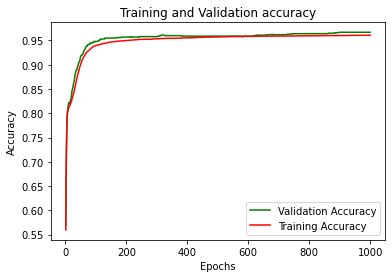

(1000,)
(1000,)
(1000,)


<Figure size 432x288 with 0 Axes>

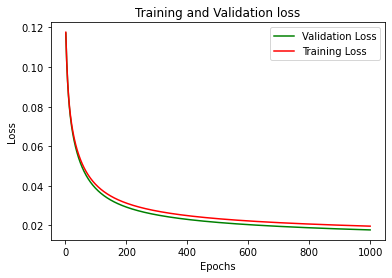

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
learning_rate=0.1
epochs=1000

weights=training(initial_w_train,x_train,x_val,train_labels,val_labels,learning_rate,epochs)


In [24]:
def finite_diff(x,y,weights,epsilon,threshold): #x_val_aug=np.hstack((x_val,np.ones((x_val.shape[0],1),dtype=x_val.dtype)))
    
    grad=gradient(weights,x,y)
    grad=grad.astype(np.float64)
    
    y=y.astype(np.float64)
    for counter in range(2):
    #get prediction
        
   
        #finite differences
    
        for k in range(len(weights)): #iterate over all positions in the weight vector
            print("k ", k)
            weights[k]=weights[k]-epsilon  #perturbate that specific position while leaving the rest intact
       
            
            loss_minus=(y-sigmoid(np.dot(x,weights)).astype(np.float64)[counter]**2)/2
        
            weights[k]+=2*epsilon
            loss_plus=(y-sigmoid(np.dot(x,weights)).astype(np.float64)[counter]**2)/2
        
            
        
        
            fraction=(loss_plus[k]-loss_minus[k])/(2*epsilon)
            
        
            
            flag=True 
            if ((grad[k]-fraction)<(threshold)):
                print(str(counter)+ ' ')
                print(str(k)+' '+str(abs(grad[k]-fraction)))
                
            else:
                flag=False
            
            weights[k]=weights[k]-epsilon
    return(flag)
        
    
    

training set with one column of ones at the end:  [[0.         0.         0.         ... 0.         0.         1.        ]
 [0.1308131  0.1308131  0.1308131  ... 0.1308131  0.1308131  1.        ]
 [0.08962205 0.08962205 0.08962205 ... 0.08962205 0.08962205 1.        ]
 ...
 [0.04505032 0.04505032 0.04505032 ... 0.04505032 0.04505032 1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.0014855  0.0014855  0.0014855  ... 0.0014855  0.0014855  1.        ]]
shape of the training set (12000, 785)
validation set with one column of ones at the end:  [[0.         0.         0.         ... 0.         0.         1.        ]
 [0.1308131  0.1308131  0.1308131  ... 0.1308131  0.1308131  1.        ]
 [0.08962205 0.08962205 0.08962205 ... 0.08962205 0.08962205 1.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.    

accuracy of training set for epoch 18 0.8221666666666667
loss of validation set for epoch 18 0.07240412439839536
accuracy of validation set for epoch 18 0.83
(785,)
(785,)
1st element of gradient vector on training data 0.00036871970718165383
###
current weight on 1st position - training set -0.0006754536831027563
---
updated weight -0.0007123256538209218
---
loss of training set for epoch 19 0.07234375973883161
accuracy of training set for epoch 19 0.82425
loss of validation set for epoch 19 0.07125427646638345
accuracy of validation set for epoch 19 0.833
(785,)
(785,)
1st element of gradient vector on training data 0.0003666370298737778
###
current weight on 1st position - training set -0.0007123256538209218
---
updated weight -0.0007489893568082995
---
loss of training set for epoch 20 0.07129142762588972
accuracy of training set for epoch 20 0.8253333333333334
loss of validation set for epoch 20 0.07016548312837216
accuracy of validation set for epoch 20 0.837
(785,)
(785,)
1st el

loss of validation set for epoch 38 0.05672895823070404
accuracy of validation set for epoch 38 0.892
(785,)
(785,)
1st element of gradient vector on training data 0.0003417540998225805
###
current weight on 1st position - training set -0.001383760806901071
---
updated weight -0.001417936216883329
---
loss of training set for epoch 39 0.057805101715578636
accuracy of training set for epoch 39 0.8763333333333333
loss of validation set for epoch 39 0.056195110475407276
accuracy of validation set for epoch 39 0.894
(785,)
(785,)
1st element of gradient vector on training data 0.0003407745484907775
###
current weight on 1st position - training set -0.001417936216883329
---
updated weight -0.0014520136717324067
---
loss of training set for epoch 40 0.05730271205090915
accuracy of training set for epoch 40 0.8793333333333333
loss of validation set for epoch 40 0.055675971239176086
accuracy of validation set for epoch 40 0.897
(785,)
(785,)
1st element of gradient vector on training data 0.00

(785,)
(785,)
1st element of gradient vector on training data 0.00032278599705352044
###
current weight on 1st position - training set -0.0020820200800927675
---
updated weight -0.0021142986797981194
---
loss of training set for epoch 60 0.04945573421340538
accuracy of training set for epoch 60 0.9155833333333333
loss of validation set for epoch 60 0.0476027185256939
accuracy of validation set for epoch 60 0.928
(785,)
(785,)
1st element of gradient vector on training data 0.0003219349989910623
###
current weight on 1st position - training set -0.0021142986797981194
---
updated weight -0.0021464921796972257
---
loss of training set for epoch 61 0.04914709740480934
accuracy of training set for epoch 61 0.91675
loss of validation set for epoch 61 0.04728679698220234
accuracy of validation set for epoch 61 0.929
(785,)
(785,)
1st element of gradient vector on training data 0.00032108737585605663
###
current weight on 1st position - training set -0.0021464921796972257
---
updated weight -0

loss of training set for epoch 80 0.044271844303652115
accuracy of training set for epoch 80 0.9315
loss of validation set for epoch 80 0.04231560013544957
accuracy of validation set for epoch 80 0.944
(785,)
(785,)
1st element of gradient vector on training data 0.00030561422321906243
###
current weight on 1st position - training set -0.0027424408644624895
---
updated weight -0.002773002286784396
---
loss of training set for epoch 81 0.04405807619321815
accuracy of training set for epoch 81 0.932
loss of validation set for epoch 81 0.04209848909768437
accuracy of validation set for epoch 81 0.944
(785,)
(785,)
1st element of gradient vector on training data 0.00030483420015257954
###
current weight on 1st position - training set -0.002773002286784396
---
updated weight -0.0028034857067996536
---
loss of training set for epoch 82 0.04384783956971912
accuracy of training set for epoch 82 0.9325833333333333
loss of validation set for epoch 82 0.041885038734780715
accuracy of validation s

loss of training set for epoch 100 0.04057968828227665
accuracy of training set for epoch 100 0.9395833333333333
loss of validation set for epoch 100 0.0385766584179479
accuracy of validation set for epoch 100 0.948
(785,)
(785,)
1st element of gradient vector on training data 0.000290723170097776
###
current weight on 1st position - training set -0.0033392709617311917
---
updated weight -0.0033683432787409693
---
loss of training set for epoch 101 0.0404226528883083
accuracy of training set for epoch 101 0.9395833333333333
loss of validation set for epoch 101 0.038418165069203786
accuracy of validation set for epoch 101 0.948
(785,)
(785,)
1st element of gradient vector on training data 0.0002900188797489887
###
current weight on 1st position - training set -0.0033683432787409693
---
updated weight -0.003397345166715868
---
loss of training set for epoch 102 0.040267828301421976
accuracy of training set for epoch 102 0.9399166666666666
loss of validation set for epoch 102 0.0382619470

loss of training set for epoch 121 0.037690286046490065
accuracy of training set for epoch 121 0.9435
loss of validation set for epoch 121 0.035667820420144145
accuracy of validation set for epoch 121 0.953
(785,)
(785,)
1st element of gradient vector on training data 0.00027674765237897705
###
current weight on 1st position - training set -0.003935516755487586
---
updated weight -0.003963191520725483
---
loss of training set for epoch 122 0.03757125191917981
accuracy of training set for epoch 122 0.9435
loss of validation set for epoch 122 0.03554833078871027
accuracy of validation set for epoch 122 0.953
(785,)
(785,)
1st element of gradient vector on training data 0.0002761242514666478
###
current weight on 1st position - training set -0.003963191520725483
---
updated weight -0.003990803945872148
---
loss of training set for epoch 123 0.03745366133581201
accuracy of training set for epoch 123 0.9434166666666667
loss of validation set for epoch 123 0.03543031794376265
accuracy of val

loss of validation set for epoch 141 0.0335297618527784
accuracy of validation set for epoch 141 0.955
(785,)
(785,)
1st element of gradient vector on training data 0.00026497063329092237
###
current weight on 1st position - training set -0.00447758561090754
---
updated weight -0.004504082674236632
---
loss of training set for epoch 142 0.03546139612930747
accuracy of training set for epoch 142 0.9459166666666666
loss of validation set for epoch 142 0.033435189264971264
accuracy of validation set for epoch 142 0.955
(785,)
(785,)
1st element of gradient vector on training data 0.0002644186721191711
###
current weight on 1st position - training set -0.004504082674236632
---
updated weight -0.004530524541448549
---
loss of training set for epoch 143 0.0353677822445523
accuracy of training set for epoch 143 0.9461666666666667
loss of validation set for epoch 143 0.03334164494074638
accuracy of validation set for epoch 143 0.955
(785,)
(785,)
1st element of gradient vector on training data

loss of training set for epoch 162 0.03376069944139343
accuracy of training set for epoch 162 0.948
loss of validation set for epoch 162 0.03173872240282058
accuracy of validation set for epoch 162 0.955
(785,)
(785,)
1st element of gradient vector on training data 0.0002540585850135343
###
current weight on 1st position - training set -0.005022868057953274
---
updated weight -0.005048273916454627
---
loss of training set for epoch 163 0.0336841956569891
accuracy of training set for epoch 163 0.948
loss of validation set for epoch 163 0.031662558692322616
accuracy of validation set for epoch 163 0.955
(785,)
(785,)
1st element of gradient vector on training data 0.0002535728987464199
###
current weight on 1st position - training set -0.005048273916454627
---
updated weight -0.005073631206329269
---
loss of training set for epoch 164 0.03360841521577679
accuracy of training set for epoch 164 0.948
loss of validation set for epoch 164 0.03158712801573464
accuracy of validation set for ep

loss of training set for epoch 183 0.03229289419793742
accuracy of training set for epoch 183 0.9491666666666667
loss of validation set for epoch 183 0.030279743249130305
accuracy of validation set for epoch 183 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.00024444534258161475
###
current weight on 1st position - training set -0.005546567893394803
---
updated weight -0.0055710124276529644
---
loss of training set for epoch 184 0.032229577216575676
accuracy of training set for epoch 184 0.9491666666666667
loss of validation set for epoch 184 0.030216916958161418
accuracy of validation set for epoch 184 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.00024401671870398202
###
current weight on 1st position - training set -0.0055710124276529644
---
updated weight -0.005595414099523363
---
loss of training set for epoch 185 0.032166796396262576
accuracy of training set for epoch 185 0.9491666666666667
loss of validation set for epoch 185 0.0301

(785,)
(785,)
1st element of gradient vector on training data 0.00023632681849213152
###
current weight on 1st position - training set -0.006027590702421581
---
updated weight -0.0060512233842707945
---
loss of training set for epoch 204 0.031066983083327372
accuracy of training set for epoch 204 0.9500833333333333
loss of validation set for epoch 204 0.029064953527359244
accuracy of validation set for epoch 204 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.00023594473379963816
###
current weight on 1st position - training set -0.0060512233842707945
---
updated weight -0.006074817857650758
---
loss of training set for epoch 205 0.031013571086332178
accuracy of training set for epoch 205 0.9501666666666667
loss of validation set for epoch 205 0.02901210344894607
accuracy of validation set for epoch 205 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.00023556479420211397
###
current weight on 1st position - training set -0.006074817857650758


(785,)
(785,)
1st element of gradient vector on training data 0.0002287324919043762
###
current weight on 1st position - training set -0.00651612899912509
---
updated weight -0.006539002248315528
---
loss of training set for epoch 225 0.030025011085342095
accuracy of training set for epoch 225 0.9513333333333334
loss of validation set for epoch 225 0.02803508625602233
accuracy of validation set for epoch 225 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.0002283921838866777
###
current weight on 1st position - training set -0.006539002248315528
---
updated weight -0.006561841466704196
---
loss of training set for epoch 226 0.029979236724299866
accuracy of training set for epoch 226 0.9513333333333334
loss of validation set for epoch 226 0.027989897986981812
accuracy of validation set for epoch 226 0.957
(785,)
(785,)
1st element of gradient vector on training data 0.0002280537034968612
###
current weight on 1st position - training set -0.006561841466704196
---
up

(785,)
(785,)
1st element of gradient vector on training data 0.00022195218618108181
###
current weight on 1st position - training set -0.006989555826624938
---
updated weight -0.007011751045243046
---
loss of training set for epoch 246 0.029126347696481533
accuracy of training set for epoch 246 0.9523333333333334
loss of validation set for epoch 246 0.02714872725455619
accuracy of validation set for epoch 246 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.0002216475160073967
###
current weight on 1st position - training set -0.007011751045243046
---
updated weight -0.007033915796843786
---
loss of training set for epoch 247 0.02908659391879605
accuracy of training set for epoch 247 0.9523333333333334
loss of validation set for epoch 247 0.027109555433409482
accuracy of validation set for epoch 247 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.0002213444076431966
###
current weight on 1st position - training set -0.007033915796843786
---
u

(785,)
(785,)
1st element of gradient vector on training data 0.00021586739121274578
###
current weight on 1st position - training set -0.00744945838637102
---
updated weight -0.0074710451254922945
---
loss of training set for epoch 267 0.028341651854681148
accuracy of training set for epoch 267 0.9525
loss of validation set for epoch 267 0.026376063642461606
accuracy of validation set for epoch 267 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00021559323394063797
###
current weight on 1st position - training set -0.0074710451254922945
---
updated weight -0.007492604448886359
---
loss of training set for epoch 268 0.028306733843226708
accuracy of training set for epoch 268 0.9525
loss of validation set for epoch 268 0.026341706449284883
accuracy of validation set for epoch 268 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00021532041705782964
###
current weight on 1st position - training set -0.007492604448886359
---
updated weight -0.00

loss of training set for epoch 287 0.027680335199607265
accuracy of training set for epoch 287 0.953
loss of validation set for epoch 287 0.025725694550535763
accuracy of validation set for epoch 287 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00021037933080815893
###
current weight on 1st position - training set -0.007897195317353058
---
updated weight -0.007918233250433874
---
loss of training set for epoch 288 0.027649193337451108
accuracy of training set for epoch 288 0.9530833333333333
loss of validation set for epoch 288 0.02569508402225111
accuracy of validation set for epoch 288 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00021013141908004588
###
current weight on 1st position - training set -0.007918233250433874
---
updated weight -0.007939246392341878
---
loss of training set for epoch 289 0.027618222637684285
accuracy of training set for epoch 289 0.95325
loss of validation set for epoch 289 0.02566464302114186
accuracy of 

loss of training set for epoch 308 0.027060370527509543
accuracy of training set for epoch 308 0.9536666666666667
loss of validation set for epoch 308 0.02511653027847854
accuracy of validation set for epoch 308 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.0002054057304851129
###
current weight on 1st position - training set -0.008333934874232191
---
updated weight -0.008354475447280702
---
loss of training set for epoch 309 0.02703252483452244
accuracy of training set for epoch 309 0.95375
loss of validation set for epoch 309 0.025089179458599013
accuracy of validation set for epoch 309 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.0002051805067479815
###
current weight on 1st position - training set -0.008354475447280702
---
updated weight -0.0083749934979555
---
loss of training set for epoch 310 0.027004821725552238
accuracy of training set for epoch 310 0.95375
loss of validation set for epoch 310 0.025061969398950692
accuracy of va

loss of training set for epoch 329 0.026504044986898876
accuracy of training set for epoch 329 0.9543333333333334
loss of validation set for epoch 329 0.024570207611240506
accuracy of validation set for epoch 329 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00020087790659443418
###
current weight on 1st position - training set -0.008760686596199994
---
updated weight -0.008780774386859437
---
loss of training set for epoch 330 0.026478960090540356
accuracy of training set for epoch 330 0.9543333333333334
loss of validation set for epoch 330 0.02454557834716812
accuracy of validation set for epoch 330 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00020067239542695666
###
current weight on 1st position - training set -0.008780774386859437
---
updated weight -0.008800841626402132
---
loss of training set for epoch 331 0.026453995349130073
accuracy of training set for epoch 331 0.9543333333333334
loss of validation set for epoch 331 0.02452106

loss of training set for epoch 350 0.02600129749679364
accuracy of training set for epoch 350 0.9543333333333334
loss of validation set for epoch 350 0.024076627375304062
accuracy of validation set for epoch 350 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.0001967383038434174
###
current weight on 1st position - training set -0.009178327305399303
---
updated weight -0.009198001135783646
---
loss of training set for epoch 351 0.025978550368750856
accuracy of training set for epoch 351 0.9543333333333334
loss of validation set for epoch 351 0.024054295744154713
accuracy of validation set for epoch 351 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00019655000598410615
###
current weight on 1st position - training set -0.009198001135783646
---
updated weight -0.009217656136382056
---
loss of training set for epoch 352 0.02595590553543947
accuracy of training set for epoch 352 0.95425
loss of validation set for epoch 352 0.02403206449696887
acc

loss of training set for epoch 371 0.025544126933437668
accuracy of training set for epoch 371 0.9546666666666667
loss of validation set for epoch 371 0.02362778274649064
accuracy of validation set for epoch 371 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00019293847130949268
###
current weight on 1st position - training set -0.009587622380155609
---
updated weight -0.009606916227286558
---
loss of training set for epoch 372 0.02552337867787454
accuracy of training set for epoch 372 0.9546666666666667
loss of validation set for epoch 372 0.023607410172510637
accuracy of validation set for epoch 372 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00019276527732944117
###
current weight on 1st position - training set -0.009606916227286558
---
updated weight -0.009626192755019502
---
loss of training set for epoch 373 0.025502718310019056
accuracy of training set for epoch 373 0.9546666666666667
loss of validation set for epoch 373 0.023587123

accuracy of validation set for epoch 391 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.000189597897830153
###
current weight on 1st position - training set -0.00997028338172932
---
updated weight -0.009989243171512336
---
loss of training set for epoch 392 0.025126086491080692
accuracy of training set for epoch 392 0.9553333333333334
loss of validation set for epoch 392 0.023217241988885102
accuracy of validation set for epoch 392 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018943742084652712
###
current weight on 1st position - training set -0.009989243171512336
---
updated weight -0.010008186913596989
---
loss of training set for epoch 393 0.02510706225190777
accuracy of training set for epoch 393 0.9553333333333334
loss of validation set for epoch 393 0.02319855470853088
accuracy of validation set for epoch 393 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.0001892775413979068
###
current weight on 1st positi

loss of validation set for epoch 411 0.02287442499201248
accuracy of validation set for epoch 411 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018649807695903542
###
current weight on 1st position - training set -0.01034649660077394
---
updated weight -0.010365146408469843
---
loss of training set for epoch 412 0.024759512967317345
accuracy of training set for epoch 412 0.9555833333333333
loss of validation set for epoch 412 0.022857068501673388
accuracy of validation set for epoch 412 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018634892323776838
###
current weight on 1st position - training set -0.010365146408469843
---
updated weight -0.01038378130079362
---
loss of training set for epoch 413 0.024741920492399604
accuracy of training set for epoch 413 0.9556666666666667
loss of validation set for epoch 413 0.02283977756172446
accuracy of validation set for epoch 413 0.959
(785,)
(785,)
1st element of gradient vector on training 

loss of training set for epoch 432 0.024419902737359986
accuracy of training set for epoch 432 0.9563333333333334
loss of validation set for epoch 432 0.02252316539061453
accuracy of validation set for epoch 432 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018347397389273143
###
current weight on 1st position - training set -0.010735079503267273
---
updated weight -0.010753426900656546
---
loss of training set for epoch 433 0.024403571263393285
accuracy of training set for epoch 433 0.9563333333333334
loss of validation set for epoch 433 0.02250710169715614
accuracy of validation set for epoch 433 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.000183335418369046
###
current weight on 1st position - training set -0.010753426900656546
---
updated weight -0.01077176044249345
---
loss of training set for epoch 434 0.024387298863518283
accuracy of training set for epoch 434 0.9563333333333334
loss of validation set for epoch 434 0.0224910954

loss of training set for epoch 453 0.02408889141384992
accuracy of training set for epoch 453 0.9565
loss of validation set for epoch 453 0.02219743889126958
accuracy of validation set for epoch 453 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018066072786082803
###
current weight on 1st position - training set -0.011117526843131033
---
updated weight -0.011135592915917116
---
loss of training set for epoch 454 0.02407372956174397
accuracy of training set for epoch 454 0.9565
loss of validation set for epoch 454 0.022182511317558485
accuracy of validation set for epoch 454 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00018053162947729957
###
current weight on 1st position - training set -0.011135592915917116
---
updated weight -0.011153646078864847
---
loss of training set for epoch 455 0.02405861989637582
accuracy of training set for epoch 455 0.9565
loss of validation set for epoch 455 0.02216763438612668
accuracy of validation set 

loss of training set for epoch 474 0.02378106692533497
accuracy of training set for epoch 474 0.9569166666666666
loss of validation set for epoch 474 0.021894216115089477
accuracy of validation set for epoch 474 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.0001780359709768589
###
current weight on 1st position - training set -0.01149425848310692
---
updated weight -0.011512062080204605
---
loss of training set for epoch 475 0.02376694108714908
accuracy of training set for epoch 475 0.9569166666666666
loss of validation set for epoch 475 0.02188029310106478
accuracy of validation set for epoch 475 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017791534333916592
###
current weight on 1st position - training set -0.011512062080204605
---
updated weight -0.011529853614538522
---
loss of training set for epoch 476 0.023752861611504777
accuracy of training set for epoch 476 0.9569166666666666
loss of validation set for epoch 476 0.0218664150

loss of training set for epoch 495 0.023493833256600014
accuracy of training set for epoch 495 0.95725
loss of validation set for epoch 495 0.021610944138477636
accuracy of validation set for epoch 495 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017558032718765937
###
current weight on 1st position - training set -0.011865650396273809
---
updated weight -0.011883208428992575
---
loss of training set for epoch 496 0.023480630062688017
accuracy of training set for epoch 496 0.9573333333333334
loss of validation set for epoch 496 0.021597914362145195
accuracy of validation set for epoch 496 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017546731382906243
###
current weight on 1st position - training set -0.011883208428992575
---
updated weight -0.011900755160375481
---
loss of training set for epoch 497 0.02346746827027083
accuracy of training set for epoch 497 0.9573333333333334
loss of validation set for epoch 497 0.02158492463748744

(785,)
(785,)
1st element of gradient vector on training data 0.00017338339682776782
###
current weight on 1st position - training set -0.012214702119859724
---
updated weight -0.0122320404595425
---
loss of training set for epoch 516 0.02322498037876889
accuracy of training set for epoch 516 0.9575833333333333
loss of validation set for epoch 516 0.021345455574363275
accuracy of validation set for epoch 516 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017327693944026764
###
current weight on 1st position - training set -0.0122320404595425
---
updated weight -0.012249368153486527
---
loss of training set for epoch 517 0.023212602957301206
accuracy of training set for epoch 517 0.9575833333333333
loss of validation set for epoch 517 0.021333224169878044
accuracy of validation set for epoch 517 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.000173170793572191
###
current weight on 1st position - training set -0.012249368153486527
---
upda

(785,)
(785,)
1st element of gradient vector on training data 0.00017131179420151662
###
current weight on 1st position - training set -0.012559481033356561
---
updated weight -0.012576612212776714
---
loss of training set for epoch 536 0.02298428274423125
accuracy of training set for epoch 536 0.9578333333333333
loss of validation set for epoch 536 0.02110744462974625
accuracy of validation set for epoch 536 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017121129618037512
###
current weight on 1st position - training set -0.012576612212776714
---
updated weight -0.01259373334239475
---
loss of training set for epoch 537 0.02297261414559293
accuracy of training set for epoch 537 0.9579166666666666
loss of validation set for epoch 537 0.021095897754891138
accuracy of validation set for epoch 537 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00017111108175177733
###
current weight on 1st position - training set -0.01259373334239475
---
up

loss of validation set for epoch 556 0.020882500452371097
accuracy of validation set for epoch 556 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00016925919606082721
###
current weight on 1st position - training set -0.012917162293187012
---
updated weight -0.012934088212793095
---
loss of training set for epoch 557 0.02274609602888196
accuracy of training set for epoch 557 0.9581666666666667
loss of validation set for epoch 557 0.020871573987290948
accuracy of validation set for epoch 557 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00016916438887926396
###
current weight on 1st position - training set -0.012934088212793095
---
updated weight -0.012951004651681022
---
loss of training set for epoch 558 0.022735101025163313
accuracy of training set for epoch 558 0.9581666666666667
loss of validation set for epoch 558 0.020860677010963745
accuracy of validation set for epoch 558 0.959
(785,)
(785,)
1st element of gradient vector on traini

loss of training set for epoch 577 0.022531820915015092
accuracy of training set for epoch 577 0.9584166666666667
loss of validation set for epoch 577 0.020659058022706886
accuracy of validation set for epoch 577 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00016732086727093884
###
current weight on 1st position - training set -0.013270649251197466
---
updated weight -0.01328738133792456
---
loss of training set for epoch 578 0.02252140863535592
accuracy of training set for epoch 578 0.9584166666666667
loss of validation set for epoch 578 0.02064872284308458
accuracy of validation set for epoch 578 0.958
(785,)
(785,)
1st element of gradient vector on training data 0.00016723123821441296
###
current weight on 1st position - training set -0.01328738133792456
---
updated weight -0.013304104461746001
---
loss of training set for epoch 579 0.022511024117747747
accuracy of training set for epoch 579 0.9584166666666667
loss of validation set for epoch 579 0.020638414

(785,)
(785,)
1st element of gradient vector on training data 0.00016557176745549774
###
current weight on 1st position - training set -0.013603614318464031
---
updated weight -0.01362017149520958
---
loss of training set for epoch 598 0.022318831547537585
accuracy of training set for epoch 598 0.9583333333333334
loss of validation set for epoch 598 0.020447481471602788
accuracy of validation set for epoch 598 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00016548664745261868
###
current weight on 1st position - training set -0.01362017149520958
---
updated weight -0.013636720159954843
---
loss of training set for epoch 599 0.02230897705108322
accuracy of training set for epoch 599 0.9583333333333334
loss of validation set for epoch 599 0.020437683729505423
accuracy of validation set for epoch 599 0.959
(785,)
(785,)
1st element of gradient vector on training data 0.00016540174292215055
###
current weight on 1st position - training set -0.013636720159954843
---


(785,)
(785,)
1st element of gradient vector on training data 0.0001639092919640811
###
current weight on 1st position - training set -0.013933164703222613
---
updated weight -0.013949555632419022
---
loss of training set for epoch 618 0.022126425911089445
accuracy of training set for epoch 618 0.9585833333333333
loss of validation set for epoch 618 0.020256038423735245
accuracy of validation set for epoch 618 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.0001638283138261142
###
current weight on 1st position - training set -0.013949555632419022
---
updated weight -0.013965938463801633
---
loss of training set for epoch 619 0.022117057220543006
accuracy of training set for epoch 619 0.9585833333333333
loss of validation set for epoch 619 0.02024670857142787
accuracy of validation set for epoch 619 0.96
(785,)
(785,)
1st element of gradient vector on training data 0.00016374753385528672
###
current weight on 1st position - training set -0.013965938463801633
---
up

(785,)
(785,)
1st element of gradient vector on training data 0.00016232647153664628
###
current weight on 1st position - training set -0.014259466904896018
---
updated weight -0.014275699552049683
---
loss of training set for epoch 638 0.021943355998292263
accuracy of training set for epoch 638 0.9589166666666666
loss of validation set for epoch 638 0.02007358563199016
accuracy of validation set for epoch 638 0.961
(785,)
(785,)
1st element of gradient vector on training data 0.00016224930658306522
###
current weight on 1st position - training set -0.014275699552049683
---
updated weight -0.01429192448270799
---
loss of training set for epoch 639 0.021934433878900424
accuracy of training set for epoch 639 0.9589166666666666
loss of validation set for epoch 639 0.02006468577309009
accuracy of validation set for epoch 639 0.961
(785,)
(785,)
1st element of gradient vector on training data 0.0001621723242835515
###
current weight on 1st position - training set -0.01429192448270799
---
up

loss of training set for epoch 658 0.021768878884219783
accuracy of training set for epoch 658 0.9588333333333333
loss of validation set for epoch 658 0.019899406144700458
accuracy of validation set for epoch 658 0.961
(785,)
(785,)
1st element of gradient vector on training data 0.00016074341311585587
###
current weight on 1st position - training set -0.014598755893330501
---
updated weight -0.014614830234642088
---
loss of training set for epoch 659 0.021760368387309357
accuracy of training set for epoch 659 0.9589166666666666
loss of validation set for epoch 659 0.019890902585770937
accuracy of validation set for epoch 659 0.961
(785,)
(785,)
1st element of gradient vector on training data 0.0001606699350522162
###
current weight on 1st position - training set -0.014614830234642088
---
updated weight -0.014630897228147309
---
loss of training set for epoch 660 0.021751877622807503
accuracy of training set for epoch 660 0.9589166666666666
loss of validation set for epoch 660 0.019882

(785,)
(785,)
1st element of gradient vector on training data 0.00015930504986484605
###
current weight on 1st position - training set -0.014918865481552043
---
updated weight -0.014934795986538527
---
loss of training set for epoch 679 0.021594201564164948
accuracy of training set for epoch 679 0.9590833333333333
loss of validation set for epoch 679 0.019724724085521853
accuracy of validation set for epoch 679 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015923481195383797
###
current weight on 1st position - training set -0.014934795986538527
---
updated weight -0.01495071946773391
---
loss of training set for epoch 680 0.02158608970518974
accuracy of training set for epoch 680 0.9590833333333333
loss of validation set for epoch 680 0.019716604339184342
accuracy of validation set for epoch 680 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.0001591647295953036
###
current weight on 1st position - training set -0.01495071946773391
---
u

accuracy of validation set for epoch 699 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015786194998531608
###
current weight on 1st position - training set -0.015251951430314756
---
updated weight -0.015267737625313287
---
loss of training set for epoch 700 0.0214275822527292
accuracy of training set for epoch 700 0.9590833333333333
loss of validation set for epoch 700 0.01955780092297029
accuracy of validation set for epoch 700 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015779485823803847
###
current weight on 1st position - training set -0.015267737625313287
---
updated weight -0.01528351711113709
---
loss of training set for epoch 701 0.021419838295108705
accuracy of training set for epoch 701 0.9590833333333333
loss of validation set for epoch 701 0.019550035459588746
accuracy of validation set for epoch 701 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.0001577279102171441
###
current weight on 1st posit

accuracy of training set for epoch 719 0.95925
loss of validation set for epoch 719 0.019412969024477394
accuracy of validation set for epoch 719 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.00015654682822043527
###
current weight on 1st position - training set -0.015566416717793345
---
updated weight -0.01558207140061539
---
loss of training set for epoch 720 0.021275827644579255
accuracy of training set for epoch 720 0.95925
loss of validation set for epoch 720 0.01940550127983915
accuracy of validation set for epoch 720 0.962
(785,)
(785,)
1st element of gradient vector on training data 0.0001564825127029431
###
current weight on 1st position - training set -0.01558207140061539
---
updated weight -0.015597719651885684
---
loss of training set for epoch 721 0.021268408440904017
accuracy of training set for epoch 721 0.95925
loss of validation set for epoch 721 0.01939804864570548
accuracy of validation set for epoch 721 0.962
(785,)
(785,)
1st element of grad

loss of validation set for epoch 739 0.019266424981674878
accuracy of validation set for epoch 739 0.963
(785,)
(785,)
1st element of gradient vector on training data 0.00015528535361868082
###
current weight on 1st position - training set -0.015878303374111682
---
updated weight -0.01589383190947355
---
loss of training set for epoch 740 0.02113035026794841
accuracy of training set for epoch 740 0.9591666666666666
loss of validation set for epoch 740 0.019259249510021132
accuracy of validation set for epoch 740 0.963
(785,)
(785,)
1st element of gradient vector on training data 0.00015522362000945273
###
current weight on 1st position - training set -0.01589383190947355
---
updated weight -0.015909354271474493
---
loss of training set for epoch 741 0.02112323328403
accuracy of training set for epoch 741 0.9591666666666666
loss of validation set for epoch 741 0.019252088120963382
accuracy of validation set for epoch 741 0.963
(785,)
(785,)
1st element of gradient vector on training dat

accuracy of validation set for epoch 759 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015407381238494186
###
current weight on 1st position - training set -0.01618771510613162
---
updated weight -0.016203122487370113
---
loss of training set for epoch 760 0.020990720133427464
accuracy of training set for epoch 760 0.9594166666666667
loss of validation set for epoch 760 0.019118634004770055
accuracy of validation set for epoch 760 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015401448416713459
###
current weight on 1st position - training set -0.016203122487370113
---
updated weight -0.01621852393578683
---
loss of training set for epoch 761 0.02098388496600005
accuracy of training set for epoch 761 0.9595
loss of validation set for epoch 761 0.019111744343002297
accuracy of validation set for epoch 761 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015395527187719017
###
current weight on 1st position - trai

loss of training set for epoch 780 0.02085654741799096
accuracy of training set for epoch 780 0.9595833333333333
loss of validation set for epoch 780 0.018983282068277617
accuracy of validation set for epoch 780 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015285174423253098
###
current weight on 1st position - training set -0.016510039402598622
---
updated weight -0.016525324577021876
---
loss of training set for epoch 781 0.020849975543309827
accuracy of training set for epoch 781 0.9595833333333333
loss of validation set for epoch 781 0.018976646434907835
accuracy of validation set for epoch 781 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.0001527947690107845
###
current weight on 1st position - training set -0.016525324577021876
---
updated weight -0.016540604053922953
---
loss of training set for epoch 782 0.020843416377692936
accuracy of training set for epoch 782 0.9595833333333333
loss of validation set for epoch 782 0.0189700

loss of validation set for epoch 800 0.0188528553111644
accuracy of validation set for epoch 800 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015173233777214783
###
current weight on 1st position - training set -0.0168146724908187
---
updated weight -0.016829845724595914
---
loss of training set for epoch 801 0.020721152338869377
accuracy of training set for epoch 801 0.9595
loss of validation set for epoch 801 0.018846457613746922
accuracy of validation set for epoch 801 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015167745374239136
###
current weight on 1st position - training set -0.016829845724595914
---
updated weight -0.016845013469970152
---
loss of training set for epoch 802 0.02071483880270349
accuracy of training set for epoch 802 0.9595
loss of validation set for epoch 802 0.018840071416944215
accuracy of validation set for epoch 802 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.000151622670674209

accuracy of training set for epoch 820 0.9596666666666667
loss of validation set for epoch 820 0.018727045689063443
accuracy of validation set for epoch 820 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015065346894251757
###
current weight on 1st position - training set -0.017117105721042934
---
updated weight -0.017132171067937185
---
loss of training set for epoch 821 0.020597093935452525
accuracy of training set for epoch 821 0.9596666666666667
loss of validation set for epoch 821 0.018720871258522762
accuracy of validation set for epoch 821 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00015060054279363502
###
current weight on 1st position - training set -0.017132171067937185
---
updated weight -0.01714723112221655
---
loss of training set for epoch 822 0.02059101071420027
accuracy of training set for epoch 822 0.9596666666666667
loss of validation set for epoch 822 0.01871470762957137
accuracy of validation set for epoch 822 0.96

accuracy of training set for epoch 840 0.9598333333333333
loss of validation set for epoch 840 0.018605572082987167
accuracy of validation set for epoch 840 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.0001496125805263235
###
current weight on 1st position - training set -0.017417417701642644
---
updated weight -0.017432378959695276
---
loss of training set for epoch 841 0.02047750670942755
accuracy of training set for epoch 841 0.9598333333333333
loss of validation set for epoch 841 0.01859960751526853
accuracy of validation set for epoch 841 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.00014956149020757396
###
current weight on 1st position - training set -0.017432378959695276
---
updated weight -0.017447335108716034
---
loss of training set for epoch 842 0.020471639795749123
accuracy of training set for epoch 842 0.9598333333333333
loss of validation set for epoch 842 0.01859365310959742
accuracy of validation set for epoch 842 0.964

loss of training set for epoch 861 0.020362121821117643
accuracy of training set for epoch 861 0.9600833333333333
loss of validation set for epoch 861 0.018482410355296942
accuracy of validation set for epoch 861 0.964
(785,)
(785,)
1st element of gradient vector on training data 0.0001485579629422205
###
current weight on 1st position - training set -0.017730542866677773
---
updated weight -0.017745398662971996
---
loss of training set for epoch 862 0.020356458375080426
accuracy of training set for epoch 862 0.9600833333333333
loss of validation set for epoch 862 0.018476652949526082
accuracy of validation set for epoch 862 0.965
(785,)
(785,)
1st element of gradient vector on training data 0.00014850867993905314
###
current weight on 1st position - training set -0.017745398662971996
---
updated weight -0.017760249530965902
---
loss of training set for epoch 863 0.020350804784607216
accuracy of training set for epoch 863 0.9601666666666666
loss of validation set for epoch 863 0.018470

(785,)
(785,)
1st element of gradient vector on training data 0.0001475878193741953
###
current weight on 1st position - training set -0.018026731774809526
---
updated weight -0.018041490556746947
---
loss of training set for epoch 882 0.02024522081973778
accuracy of training set for epoch 882 0.96025
loss of validation set for epoch 882 0.018363473390368364
accuracy of validation set for epoch 882 0.965
(785,)
(785,)
1st element of gradient vector on training data 0.0001475401525063324
###
current weight on 1st position - training set -0.018041490556746947
---
updated weight -0.01805624457199758
---
loss of training set for epoch 883 0.020239758338113235
accuracy of training set for epoch 883 0.96025
loss of validation set for epoch 883 0.0183579107743273
accuracy of validation set for epoch 883 0.965
(785,)
(785,)
1st element of gradient vector on training data 0.00014749256390701702
###
current weight on 1st position - training set -0.01805624457199758
---
updated weight -0.01807099

(785,)
(785,)
1st element of gradient vector on training data 0.00014660294534393046
###
current weight on 1st position - training set -0.018335675462582038
---
updated weight -0.01835033575711643
---
loss of training set for epoch 903 0.020132419075894175
accuracy of training set for epoch 903 0.9601666666666666
loss of validation set for epoch 903 0.01824851195107104
accuracy of validation set for epoch 903 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014655687412504963
###
current weight on 1st position - training set -0.01835033575711643
---
updated weight -0.018364991444528935
---
loss of training set for epoch 904 0.020127145638023782
accuracy of training set for epoch 904 0.9601666666666666
loss of validation set for epoch 904 0.018243132789937663
accuracy of validation set for epoch 904 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014651087644622447
###
current weight on 1st position - training set -0.018364991444528935
---


loss of training set for epoch 923 0.02002857973518113
accuracy of training set for epoch 923 0.9603333333333334
loss of validation set for epoch 923 0.018142511589831163
accuracy of validation set for epoch 923 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.000145650611930411
###
current weight on 1st position - training set -0.01864258380592852
---
updated weight -0.01865714886712156
---
loss of training set for epoch 924 0.020023476145321368
accuracy of training set for epoch 924 0.9603333333333334
loss of validation set for epoch 924 0.018137297459193992
accuracy of validation set for epoch 924 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.000145606040969573
###
current weight on 1st position - training set -0.01865714886712156
---
updated weight -0.018671709471218517
---
loss of training set for epoch 925 0.02001838080101558
accuracy of training set for epoch 925 0.9603333333333334
loss of validation set for epoch 925 0.01813209134552

loss of validation set for epoch 943 0.01803972786834335
accuracy of validation set for epoch 943 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.0001447721178428685
###
current weight on 1st position - training set -0.018933045975070506
---
updated weight -0.018947523186854793
---
loss of training set for epoch 944 0.019923106062278744
accuracy of training set for epoch 944 0.9605833333333333
loss of validation set for epoch 944 0.018034670048825124
accuracy of validation set for epoch 944 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.000144728894042644
###
current weight on 1st position - training set -0.018947523186854793
---
updated weight -0.018961996076259056
---
loss of training set for epoch 945 0.019918170948557863
accuracy of training set for epoch 945 0.9605833333333333
loss of validation set for epoch 945 0.018029619827915185
accuracy of validation set for epoch 945 0.967
(785,)
(785,)
1st element of gradient vector on training 

loss of training set for epoch 964 0.01982585912479678
accuracy of training set for epoch 964 0.9606666666666667
loss of validation set for epoch 964 0.017935083106087553
accuracy of validation set for epoch 964 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.0001438779084363395
###
current weight on 1st position - training set -0.019236168310077222
---
updated weight -0.019250556100920857
---
loss of training set for epoch 965 0.019821075779289685
accuracy of training set for epoch 965 0.9606666666666667
loss of validation set for epoch 965 0.017930180739474715
accuracy of validation set for epoch 965 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014383602008369626
###
current weight on 1st position - training set -0.019250556100920857
---
updated weight -0.019264939702929227
---
loss of training set for epoch 966 0.019816299811346607
accuracy of training set for epoch 966 0.9605833333333333
loss of validation set for epoch 966 0.0179252

accuracy of training set for epoch 984 0.9605
loss of validation set for epoch 984 0.017838381520340837
accuracy of validation set for epoch 984 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014305167096378006
###
current weight on 1st position - training set -0.019523135198839282
---
updated weight -0.01953744036593566
---
loss of training set for epoch 985 0.019726932607146162
accuracy of training set for epoch 985 0.9605
loss of validation set for epoch 985 0.017833619555120788
accuracy of validation set for epoch 985 0.967
(785,)
(785,)
1st element of gradient vector on training data 0.00014301098482271183
###
current weight on 1st position - training set -0.01953744036593566
---
updated weight -0.019551741464417932
---
loss of training set for epoch 986 0.019722300183243304
accuracy of training set for epoch 986 0.9605
loss of validation set for epoch 986 0.017828864424075618
accuracy of validation set for epoch 986 0.967
(785,)
(785,)
1st element of grad

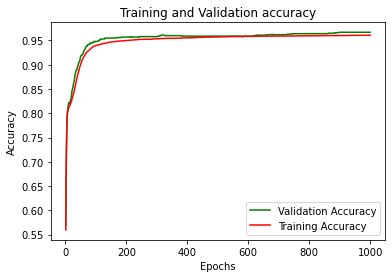

(1000,)
(1000,)
(1000,)


<Figure size 432x288 with 0 Axes>

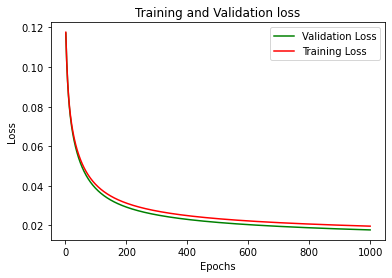

(785,)
(785,)
k  0
k  1
k  2
0 
2 1.4128609140843019e-05
k  3
0 
3 2.4491037550255556e-06
k  4
0 
4 8.211733821005393e-05
k  5
0 
5 5.645612497852676e-05
k  6
0 
6 5.3612063302577624e-05
k  7
k  8
k  9
k  10
k  11
k  12
k  13
0 
13 0.00013332707853901666
k  14
0 
14 0.00041679382667041625
k  15
k  16
k  17
k  18
k  19
k  20
k  21
0 
21 3.906225571025819e-05
k  22
0 
22 4.630543079257649e-06
k  23
k  24
0 
24 2.2132914174405728e-05
k  25
0 
25 1.1913967634171077e-05
k  26
k  27
k  28
k  29
k  30
0 
30 3.975037948043758e-05
k  31
0 
31 5.032407894555588e-05
k  32
0 
32 0.00027869619259509383
k  33
0 
33 0.00034774612373889875
k  34
0 
34 0.00026430695190794
k  35
0 
35 0.0002151530922088876
k  36
0 
36 3.2769310099232884e-06
k  37
k  38
k  39
k  40
k  41
k  42
k  43
k  44
k  45
k  46
k  47
k  48
0 
48 0.00021544670195898863
k  49
0 
49 0.0004322620475174929
k  50
0 
50 0.0004436078389807507
k  51
0 
51 0.0004222103992908976
k  52
0 
52 0.0003114527621952966
k  53
0 
53 0.0001976137776588

0 
662 0.000318203769016088
k  663
0 
663 0.0007036041567265888
k  664
0 
664 0.0006758954444481963
k  665
0 
665 0.0006634730672315032
k  666
0 
666 0.00020772672486413758
k  667
k  668
0 
668 0.00018217559651004117
k  669
0 
669 0.0002630405048698043
k  670
0 
670 0.0003320708469497545
k  671
0 
671 1.973655982908889e-06
k  672
k  673
k  674
0 
674 0.00033183132045485887
k  675
0 
675 0.0004960913408095083
k  676
0 
676 0.00019614382485565507
k  677
0 
677 0.00017062776404377464
k  678
0 
678 5.295422589836943e-05
k  679
k  680
k  681
k  682
k  683
k  684
k  685
k  686
k  687
k  688
0 
688 0.00020020827080828376
k  689
0 
689 0.0001576968296084657
k  690
0 
690 0.00011237526475223602
k  691
0 
691 0.000305005607732345
k  692
0 
692 0.00027809223717662135
k  693
0 
693 0.0004086550882675468
k  694
0 
694 0.00011022175803608933
k  695
k  696
0 
696 0.00015236462743527655
k  697
0 
697 0.0004961895576269555
k  698
0 
698 0.0004923915938016412
k  699
k  700
k  701
k  702
0 
702 0.0002689

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [25]:
epsilon=0.0000001
threshold=0.0000001
x_val_aug=np.hstack((x_val,np.ones((x_val.shape[0],1),dtype=x_val.dtype)))

training(initial_w_train,x_train,x_val,train_labels,val_labels,learning_rate,epochs)

if(finite_diff(x_val_aug,val_labels,weights,epsilon,threshold)==True):
    print("gradient check correct")